In [1]:
import psutil
import pygetwindow as gw
import mss
import cv2
import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
import win32gui
import win32con

In [2]:
"""for proc in psutil.process_iter():
    try:
        print(proc.name())
    except psutil.NoSuchProcess:
        pass"""
    

'for proc in psutil.process_iter():\n    try:\n        print(proc.name())\n    except psutil.NoSuchProcess:\n        pass'

In [3]:
program = "Fusion 3.64 - SegaCD - Penn & Teller's Smoke and Mirrors"
windows = gw.getWindowsWithTitle(program)
hwnd = win32gui.FindWindow(None, program)
win32gui.ShowWindow(hwnd, win32con.SW_RESTORE)

24

In [5]:
window = windows[0]

bbox = {
    "top": window.top,
    "left": window.left,
    "width": window.width,
    "height": window.height 
}
bbox

{'top': 190, 'left': 1754, 'width': 646, 'height': 529}

In [155]:
with mss.mss() as sct: 
    screenshot = sct.grab(bbox)

(np.float64(-0.5), np.float64(645.5), np.float64(528.5), np.float64(-0.5))

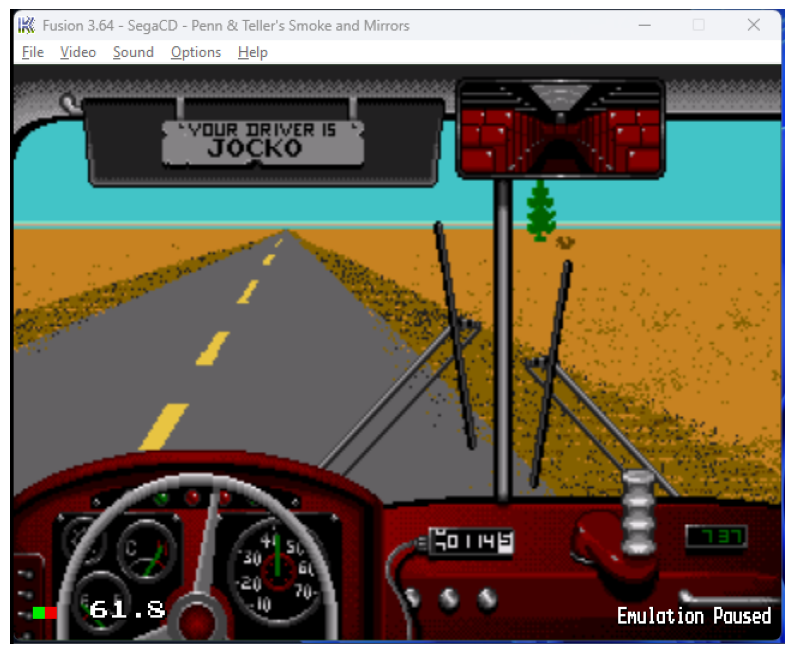

In [156]:
img = np.array(screenshot)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")

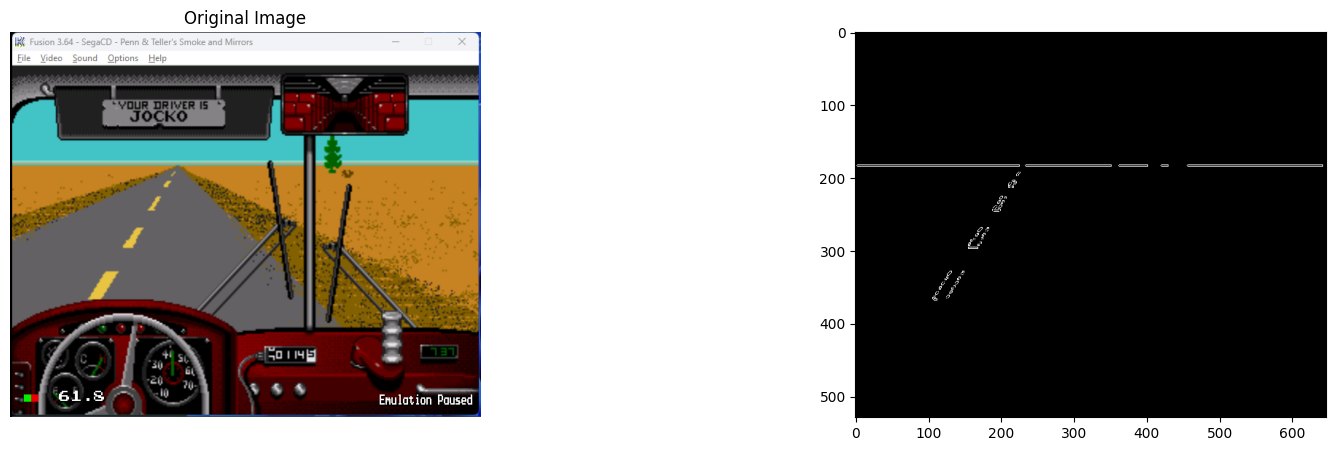

In [157]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower_yellow = np.array([20, 100, 150])  
upper_yellow = np.array([30, 150, 255]) 
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

result = cv2.bitwise_and(img, img, mask=mask)

edges = cv2.Canny(result, 50, 150)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

plt.imshow(edges, cmap="gray")

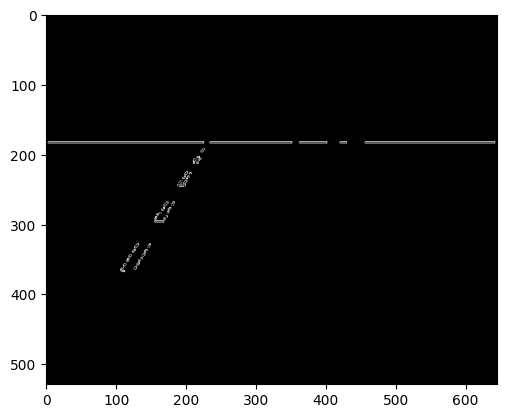

In [158]:
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

plt.imshow(edges, cmap="gray")

In [159]:
"""hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower_red1 = np.array([0, 100, 100])   
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Step 4: Create masks for both red ranges and combine them
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

red_result = cv2.bitwise_and(img, img, mask=red_mask)

# Display results using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(red_mask, cmap="gray")
axes[1].set_title("Red Mask")
axes[1].axis("off")"""

'hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)\nlower_red1 = np.array([0, 100, 100])   \nupper_red1 = np.array([10, 255, 255])\n\nlower_red2 = np.array([170, 100, 100])\nupper_red2 = np.array([180, 255, 255])\n\n# Step 4: Create masks for both red ranges and combine them\nmask1 = cv2.inRange(hsv, lower_red1, upper_red1)\nmask2 = cv2.inRange(hsv, lower_red2, upper_red2)\nred_mask = cv2.bitwise_or(mask1, mask2)\n\nred_result = cv2.bitwise_and(img, img, mask=red_mask)\n\n# Display results using matplotlib\nfig, axes = plt.subplots(1, 2, figsize=(15, 5))\n\n\naxes[0].imshow(img)\naxes[0].set_title("Original Image")\naxes[0].axis("off")\n\naxes[1].imshow(red_mask, cmap="gray")\naxes[1].set_title("Red Mask")\naxes[1].axis("off")'

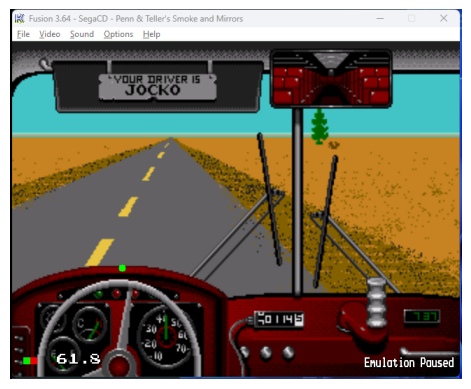

In [160]:
img_from_copy = img.copy()

point = (160, 370)

color = (0, 255, 0)
radius = 5
thickness = -1
cv2.circle(img_from_copy, point, radius, color, thickness)

plt.imshow(img_from_copy)
plt.axis("off")
plt.show()

(np.float64(-0.5), np.float64(645.5), np.float64(528.5), np.float64(-0.5))

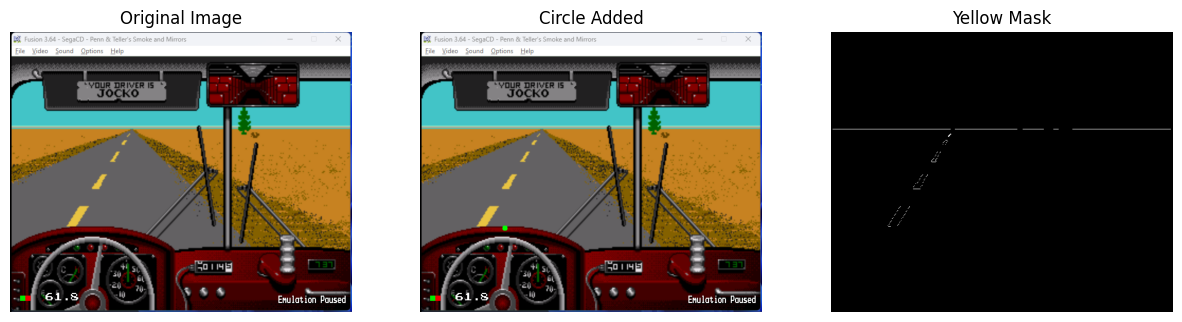

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(img_from_copy)
axes[1].set_title("Circle Added")
axes[1].axis("off")

axes[2].imshow(mask, cmap="gray")
axes[2].set_title("Yellow Mask")
axes[2].axis("off")

In [162]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower_yellow = np.array([20, 100, 150])
upper_yellow = np.array([30, 180, 255])
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

countours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

yellow_contour = max(countours, key=cv2.contourArea)
print(yellow_contour)

start_point = (160,370)

image_height = img.shape[0]

min_y_threshold = image_height * 0.5
bottom_contour_points = [tuple(point[0]) for point in yellow_contour if point[0][1] > min_y_threshold]
print(bottom_contour_points)

min_distance = float("inf")
closest_point = None

for contour_point in bottom_contour_points:
    distance = np.sqrt((start_point[0] - contour_point[0])**2 + (start_point[1] - contour_point[1])**2)
    print(distance)
    if distance < min_distance:
        min_distance = distance
        closest_point = contour_point



[[[173 269]]

 [[169 273]]

 [[169 276]]

 [[168 277]]

 [[167 277]]

 [[167 278]]

 [[165 280]]

 [[165 282]]

 [[161 286]]

 [[159 286]]

 [[159 289]]

 [[158 290]]

 [[157 290]]

 [[157 291]]

 [[156 292]]

 [[155 292]]

 [[155 296]]

 [[168 296]]

 [[168 293]]

 [[172 289]]

 [[172 285]]

 [[174 283]]

 [[174 280]]

 [[175 279]]

 [[176 279]]

 [[176 278]]

 [[178 276]]

 [[178 274]]

 [[182 270]]

 [[182 269]]]
[(np.int32(173), np.int32(269)), (np.int32(169), np.int32(273)), (np.int32(169), np.int32(276)), (np.int32(168), np.int32(277)), (np.int32(167), np.int32(277)), (np.int32(167), np.int32(278)), (np.int32(165), np.int32(280)), (np.int32(165), np.int32(282)), (np.int32(161), np.int32(286)), (np.int32(159), np.int32(286)), (np.int32(159), np.int32(289)), (np.int32(158), np.int32(290)), (np.int32(157), np.int32(290)), (np.int32(157), np.int32(291)), (np.int32(156), np.int32(292)), (np.int32(155), np.int32(292)), (np.int32(155), np.int32(296)), (np.int32(168), np.int32(296)), (np

In [163]:
closest_point
min_distance 

#np.float64(131.3202193114221) bus on right side
#np.float64(78.89233169326408) bus on left side



np.float64(74.16872656315464)

(np.int32(155), np.int32(296))


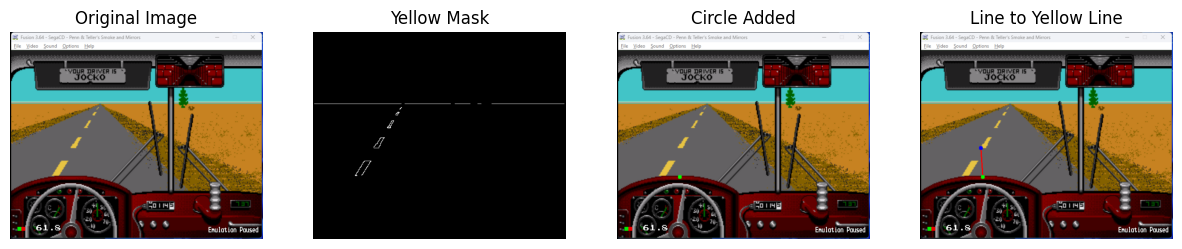

In [164]:
image_with_line = img.copy()
print(closest_point)
if closest_point:
    cv2.line(image_with_line, start_point, closest_point, (255, 0, 0), thickness=2)  # Blue line
    cv2.circle(image_with_line, start_point, 5, (0, 255, 0), -1)  # Green starting point
    cv2.circle(image_with_line, closest_point, 5, (0, 0, 255), -1)  # Blue closest point


closest_point

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(mask, cmap="gray")
axes[1].set_title("Yellow Mask")
axes[1].axis("off")

axes[2].imshow(img_from_copy)
axes[2].set_title("Circle Added")
axes[2].axis("off")

axes[3].imshow(image_with_line)
axes[3].set_title("Line to Yellow Line")
axes[3].axis("off")

plt.show()

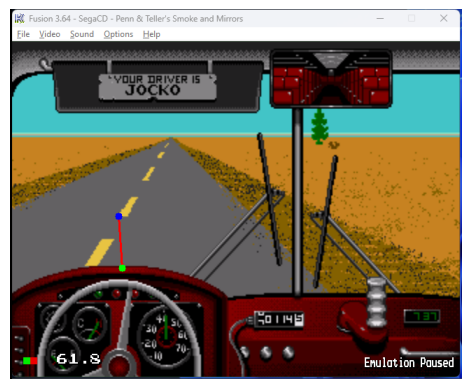

In [165]:
plt.imshow(image_with_line)
plt.axis("off")
plt.show()

In [166]:
print(closest_point)
print(start_point)

(np.int32(155), np.int32(296))
(160, 370)


In [167]:
sid_of_closest_point = "right" if closest_point[0] > start_point[0] else "left"
sid_of_closest_point

'left'